In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import xlsxwriter #The XlsxWriter libarary for 

In [2]:
import os
os.getcwd()

'C:\\Users\\Pedro Martinez\\Downloads\\Sleefs\\AssociationAnalysis'

In [3]:
%pwd

'C:\\Users\\Pedro Martinez\\Downloads\\Sleefs\\AssociationAnalysis'

In [4]:
df_2018 = pd.read_csv('sales_2018-01-01_2018-12-31_byCustomer.csv')
df_2019 = pd.read_csv('sales_2019-01-01_2019-12-31_byCustomer.csv')
df_2020 = pd.read_csv('sales_2020-01-01_2020-12-31_byCustomer.csv')
df_2021 = pd.read_csv('sales_2021-01-01_2021-08-26_byCustomer.csv')

In [5]:
df = pd.concat([df_2018,df_2019,df_2020,df_2021],axis=0)

In [6]:
df.head(5)

,month,product_type,customer_id,customer_email,billing_city,billing_postal_code,billing_region,billing_country,customer_name,net_sales,ordered_item_quantity
0,2018-01,Sleeve,6580477642,garrardjakeb@gmail.com,Burley,83318,Idaho,United States,Jakeb Garrard,0.0,1
1,2018-01,Sleeve,168590737418,Erick111499@icloud.com,Oakland,94619,California,United States,Erick Salas,11.5,3
2,2018-01,NaN,150136520714,Syntheticllc@gmail.com,Kapolei,96707,Hawaii,United States,Danny Tran,0.0,0
3,2018-01,Sleeve,150011838474,torresjimmy30@yahoo.com,Jacksonville,32225,Florida,United States,N/A N/A,4.0,2
4,2018-01,NaN,983574337,JMARTINEZ2309@YAHOO.COM,Miami,33162,Florida,United States,JOSE MARTINEZ,0.0,0


In [7]:
df.tail(5)

,month,product_type,customer_id,customer_email,billing_city,billing_postal_code,billing_region,billing_country,customer_name,net_sales,ordered_item_quantity
237422,2021-08,NaN,3864753373277,me@brentjanderson.com,American Fork,84003,Utah,United States,Michelle Anderson,0.0,0
237423,2021-08,NaN,5161594060893,mstellabk65@gmail.com,Oakfield,38362-9710,Tennessee,United States,Mary Baker,0.0,0
237424,2021-08,Sleeve,5165478346845,kenleychilcott@yahoo.com,Spring Hill,37174,Tennessee,United States,Kenley Chilcott,25.5,2
237425,2021-08,Visor,5161429663837,cferg247@icloud.com,Christiana,37037,Tennessee,United States,Cache Ferguson,70.0,1
237426,2021-08,NaN,5165802127453,emilyblalock@ymail.com,Dyersburg,38024,Tennessee,United States,Emily Blalock,0.0,0


In [8]:
del [df_2018,df_2019,df_2020,df_2021]

In [9]:
df.shape

(1217320, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217320 entries, 0 to 237426
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   month                  1217320 non-null  object 
 1   product_type           758378 non-null   object 
 2   customer_id            1217320 non-null  int64  
 3   customer_email         1212675 non-null  object 
 4   billing_city           1216286 non-null  object 
 5   billing_postal_code    1216349 non-null  object 
 6   billing_region         1208712 non-null  object 
 7   billing_country        1216314 non-null  object 
 8   customer_name          1216948 non-null  object 
 9   net_sales              1217320 non-null  float64
 10  ordered_item_quantity  1217320 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 111.4+ MB


In [11]:
# Removing irrelevant data
df = df[df['net_sales']>0]
df = df[df['ordered_item_quantity']>0]

df.head(5)

,month,product_type,customer_id,customer_email,billing_city,billing_postal_code,billing_region,billing_country,customer_name,net_sales,ordered_item_quantity
1,2018-01,Sleeve,168590737418,Erick111499@icloud.com,Oakland,94619,California,United States,Erick Salas,11.5,3
3,2018-01,Sleeve,150011838474,torresjimmy30@yahoo.com,Jacksonville,32225,Florida,United States,N/A N/A,4.0,2
5,2018-01,Sleeve,175311454218,jessicachacon886@gmail.com,Camden,08105,New Jersey,United States,Jessicachacon N/A,10.0,1
7,2018-01,Sleeve,6419399562,budkitc@sbcglobal.net,Hudsonville,49426,Michigan,United States,Douglas Kitchen,8.0,4
9,2018-01,Sleeve,187045675018,darleencosta@yahoo.com,Providence,02908,Rhode Island,United States,Dee costa-quezada,10.0,2


In [12]:
df[['product_type']].describe()

,product_type
count,718477
unique,132
top,Sleeve
freq,94588


In [13]:
# unique 'product_type'
df['product_type'].value_counts(sort=True)

Sleeve                  94588
Wide Headband           84445
Neck Gaiter             55439
Spats                   52977
Mask With Nose Shape    35102
                        ...  
Visor Decal                 9
Shorts sleeve Jersey        7
Over Knee Socks             1
Racerback                   1
Basics Shirt                1
Name: product_type, Length: 132, dtype: int64

In [14]:
# unique clients (Customer ID)
df['customer_id'].value_counts(sort=True).sum()

718626

In [15]:
# unique clients (Customer eMail)
df['customer_email'].value_counts(sort=True).sum()

715893

In [16]:
# check amount of NAs
df.isna().sum()

month                       0
product_type              149
customer_id                 0
customer_email           2733
billing_city              436
billing_postal_code       420
billing_region           5234
billing_country           410
customer_name             331
net_sales                   0
ordered_item_quantity       0
dtype: int64

In [17]:
# certain items don't have 'prodyc_type'
df[df['product_type'].isna()]

,month,product_type,customer_id,customer_email,billing_city,billing_postal_code,billing_region,billing_country,customer_name,net_sales,ordered_item_quantity
13663,2018-01,NaN,7073209034,design@panagrafixs.com,Orlando,32808,Florida,United States,anthony daniel,60.0,20
15648,2018-02,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1
31219,2018-03,NaN,5395357130,Moralestwinz6@gmail.com,San Jose,95122,California,United States,Edgar Morales,5.0,1
53462,2018-04,NaN,88353603594,kcarroll152@gmail.com,Porter,77365,Texas,United States,KC Carroll,40.0,2
56525,2018-05,NaN,1461271937,almspmdca1118@gmail.com,Royal Palm Beach,33411,Florida,United States,Alison martin,260.0,13
...,...,...,...,...,...,...,...,...,...,...,...
177135,2021-07,NaN,5138417778781,wjohn17@yahoo.com,Harrisburg,17111,Pennsylvania,United States,Willard Johnson,50.0,1
191693,2021-08,NaN,5168632791133,blaylockmykel2113@gmail.com,Arlington,76011,Texas,United States,mykel blaylock,12.0,1
194805,2021-08,NaN,1603066945,pkntw@hotmail.com,New Lenox,60451,Illinois,United States,Kathleen Jones,12.0,1
197419,2021-08,NaN,5174400155741,bbroggs1@gmail.com,Brockton,02302,Massachusetts,United States,Brandie Broglin,12.0,1


this could be some peculiar transaction (e.g. a return or an unlisted product)

In [18]:
# removing them:
df = df[~df['product_type'].isna()]
df.isna().sum()

month                       0
product_type                0
customer_id                 0
customer_email           2726
billing_city              435
billing_postal_code       419
billing_region           5233
billing_country           409
customer_name             327
net_sales                   0
ordered_item_quantity       0
dtype: int64

In [19]:
# example of transactions without email
df[df['customer_email'].isna()]

,month,product_type,customer_id,customer_email,billing_city,billing_postal_code,billing_region,billing_country,customer_name,net_sales,ordered_item_quantity
578,2018-01,Kids Tights,149484470282,NaN,Hialeah,33018,Florida,United States,Odales Velazquez,14.00,2
676,2018-01,Tights,149597585418,NaN,NaN,NaN,Alabama,United States,walk in,30.00,2
2180,2018-01,Head N Nek,146838781962,NaN,NaN,NaN,Alabama,United States,walk in,25.00,4
3998,2018-01,Spats,0,NaN,Thomson,30824,Georgia,United States,NaN,5.00,1
7975,2018-01,Spats,0,NaN,Miami Gardens,33169,Florida,United States,NaN,10.50,1
...,...,...,...,...,...,...,...,...,...,...,...
300726,2020-09,Mask With Nose Shape,3772202221661,NaN,Laurel Park,28739,North Carolina,United States,Judith Arthur,7.00,1
350879,2020-10,Mask With Nose Shape,3444847312989,NaN,Brandford,06405,Connecticut,United States,David Carlson,180.00,12
443601,2020-12,Mask With Nose Shape,3880991391837,NaN,NaN,NaN,Alabama,United States,Mariana,12.25,7
449907,2020-12,Mask Lanyard,3880991391837,NaN,NaN,NaN,Alabama,United States,Mariana,21.00,14


### Pivoting DataFrame

In [20]:
pivot = df.groupby(['customer_id','product_type'])['ordered_item_quantity'].sum()
pivot
#.unstack().reset_index().fillna(0).set_index('order_name'))

customer_id    product_type    
0              3/4 Tights           3
               Arm Shiver          22
               Back Plate Decal     8
               Batting Gloves       1
               Bicep Band          19
                                   ..
5177677676637  Sleeve               1
5177682362461  Mouthguard           3
5177683804253  Sleeve               1
               Spats                1
               Tie Headband         1
Name: ordered_item_quantity, Length: 640026, dtype: int64

In [21]:
pivot_unstack = pivot.unstack(level=-1)
pivot_unstack

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,3.0,22.0,8.0,NaN,NaN,1.0,19.0,NaN,1.0,...,NaN,NaN,109.0,NaN,NaN,62.0,9.0,5.0,NaN,NaN
270354897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279089689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279108701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279110557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177660801117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177661751389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177677676637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pivot_unstack.shape

(336191, 132)

In [23]:
## number of different products bought by each client
pivot_unstack.count(axis=1,numeric_only=True)

customer_id
0                33
270354897         1
279089689         1
279108701         6
279110557         1
                 ..
5177660801117     2
5177661751389     1
5177677676637     1
5177682362461     1
5177683804253     3
Length: 336191, dtype: int64

In [24]:
# example:
pivot_unstack.columns[pivot_unstack.loc[5177661751389].notnull()] # this should show only one product_type

Index(['Visor'], dtype='object', name='product_type')

In [25]:
# removing clients that haven't more than one product
pivot_unstacked = pivot_unstack[pivot_unstack.count(axis=1,numeric_only=True) > 1 ]
pivot_unstacked

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,3.0,22.0,8.0,NaN,NaN,1.0,19.0,NaN,1.0,...,NaN,NaN,109.0,NaN,NaN,62.0,9.0,5.0,NaN,NaN
279108701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279134853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
279170257,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279644337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177646678109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177650970717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177658212445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# check
(pivot_unstacked.count(axis=1,numeric_only=True)==0).sum()

0

In [27]:
pivot_unstacked.shape

(142522, 132)

In [28]:
# products that have been purchased only once
pivot_unstacked.columns[pivot_unstacked.count(axis=0,numeric_only=True)==1]

Index(['Basics Shirt', 'Over Knee Socks', 'Racerback'], dtype='object', name='product_type')

In [29]:
# convert the units to 1 hot-encoding values

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    

In [30]:
pivot_unstacked.applymap(encode_units)

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN
279108701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279134853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
279170257,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279644337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177646678109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177650970717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177658212445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# clients that have purchased the most  number of different products
pivot_unstacked.count(axis=1,numeric_only=True).sort_values(ascending=False)

customer_id
0                33
272189587466     33
3473635082333    31
133463900170     26
72973090826      26
                 ..
3795368247389     2
1872712368221     2
3417882394717     2
1872774234205     2
1918521933917     2
Length: 142522, dtype: int64

In [32]:
pivot_ = pivot_unstacked.applymap(encode_units).fillna(0)

In [33]:
pivot_

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
279108701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279134853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
279170257,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279644337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177646678109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5177650970717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5177658212445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
pivot_.shape

(142522, 132)

In [35]:
num_clients = pivot_.shape[0]
num_products = pivot_.shape[1]

In [36]:
pivot_[['Goggles','Goggle Strap']]

product_type,Goggles,Goggle Strap
customer_id,,
0,0.0,0.0
279108701,0.0,0.0
279134853,0.0,0.0
279170257,0.0,0.0
279644337,0.0,0.0
...,...,...
5177646678109,0.0,0.0
5177650970717,0.0,0.0
5177658212445,0.0,0.0


In [37]:
pivot_[['Goggles','Goggle Strap']].sum(axis=1)

customer_id
0                0.0
279108701        0.0
279134853        0.0
279170257        0.0
279644337        0.0
                ... 
5177646678109    0.0
5177650970717    0.0
5177658212445    0.0
5177660801117    0.0
5177683804253    0.0
Length: 142522, dtype: float64

In [38]:
(pivot_[['Goggles','Goggle Strap']].sum(axis=1)>1).sum()

228

In [39]:
# number of products bought by more than 1 client:
(pivot_.sum(axis=0)>1).sum()

129

In [40]:
# num of clients
len(pivot_.index)

142522

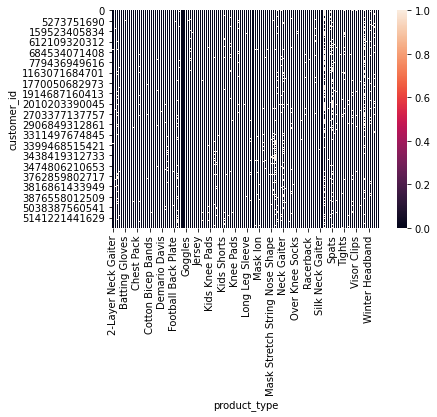

In [41]:
sns.heatmap(pivot_)

In [43]:
pivot_mean = pivot_.mean()
pivot_mean

product_type
2-Layer Neck Gaiter      0.011437
3/4 Tights               0.035167
Arm Shiver               0.057542
Back Plate Decal         0.031911
Basics Shirt             0.000007
                           ...   
Wristband                0.077581
Yoga Pants               0.004701
customization service    0.060012
treDCAL                  0.000337
zakeke-design            0.000077
Length: 132, dtype: float64

In [ ]:
pivot_mean.sort_values(ascending=False)

In [155]:
display(pivot_mean.index[0])
display(pivot_mean.values[0])

'2-Layer Neck Gaiter'

0.01143683080506869

In [150]:
pivot_mean.loc['Visor Decal']

5.6131684932852475e-05

#### Correlation

In [45]:
pivot_corr=pivot_.corr()
pivot_corr

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
product_type,,,,,,,,,,,,,,,,,,,,,
2-Layer Neck Gaiter,1.000000,-0.007996,-0.015243,-0.011269,-0.000285,0.002213,-0.003392,-0.002060,-0.000038,-0.005102,...,-0.008661,-0.005229,-0.031336,-0.001857,-0.002363,-0.012200,-0.001604,-0.022454,-0.001974,-0.000945
3/4 Tights,-0.007996,1.000000,0.007786,-0.012123,-0.000506,0.009523,0.015048,0.017828,0.015467,0.019111,...,-0.012772,-0.002212,0.008797,0.026399,-0.000205,0.016541,0.034213,-0.015521,0.006876,-0.001677
Arm Shiver,-0.015243,0.007786,1.000000,0.031079,-0.000655,0.005012,-0.006477,0.015605,-0.000173,0.001647,...,0.019122,0.002277,-0.000999,-0.004320,-0.006571,0.023512,-0.008613,-0.021459,0.002033,0.004689
Back Plate Decal,-0.011269,-0.012123,0.031079,1.000000,-0.000481,-0.004762,-0.007312,-0.003983,-0.008664,-0.005239,...,0.140069,0.029039,-0.030515,-0.008759,-0.004980,0.015544,-0.009560,-0.023352,0.014073,0.007493
Basics Shirt,-0.000285,-0.000506,-0.000655,-0.000481,1.000000,-0.000069,-0.000120,-0.000122,-0.000147,-0.000126,...,-0.000360,-0.000129,0.003912,-0.000139,-0.000147,0.009134,-0.000182,-0.000669,-0.000049,-0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wristband,-0.012200,0.016541,0.023512,0.015544,0.009134,0.012404,0.021246,0.024451,0.041541,0.015613,...,-0.007887,0.003209,0.054272,0.019389,0.002497,1.000000,-0.000759,-0.018061,0.006112,0.003423
Yoga Pants,-0.001604,0.034213,-0.008613,-0.009560,-0.000182,-0.001803,0.044699,0.016987,0.027608,0.040084,...,-0.007021,-0.003341,0.010904,0.047383,0.001776,-0.000759,1.000000,-0.000090,0.004329,-0.000604
customization service,-0.022454,-0.015521,-0.021459,-0.023352,-0.000669,-0.004374,0.000391,-0.000647,-0.000216,0.002369,...,-0.015463,-0.000709,0.054145,-0.000827,-0.001127,-0.018061,-0.000090,1.000000,0.009852,0.001143


In [61]:
pivot_corr.round(decimals=2)

product_type,2-Layer Neck Gaiter,3/4 Tights,Arm Shiver,Back Plate Decal,Basics Shirt,Bat Grip,Batting Gloves,Bicep Band,Bracelet,Bucket Hats,...,Visor Skin,Visor with Skin,Wide Headband,Windbreaker,Winter Headband,Wristband,Yoga Pants,customization service,treDCAL,zakeke-design
product_type,,,,,,,,,,,,,,,,,,,,,
2-Layer Neck Gaiter,1.00,-0.01,-0.02,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,...,-0.01,-0.01,-0.03,-0.00,-0.00,-0.01,-0.00,-0.02,-0.00,-0.00
3/4 Tights,-0.01,1.00,0.01,-0.01,-0.00,0.01,0.02,0.02,0.02,0.02,...,-0.01,-0.00,0.01,0.03,-0.00,0.02,0.03,-0.02,0.01,-0.00
Arm Shiver,-0.02,0.01,1.00,0.03,-0.00,0.01,-0.01,0.02,-0.00,0.00,...,0.02,0.00,-0.00,-0.00,-0.01,0.02,-0.01,-0.02,0.00,0.00
Back Plate Decal,-0.01,-0.01,0.03,1.00,-0.00,-0.00,-0.01,-0.00,-0.01,-0.01,...,0.14,0.03,-0.03,-0.01,-0.00,0.02,-0.01,-0.02,0.01,0.01
Basics Shirt,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wristband,-0.01,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.04,0.02,...,-0.01,0.00,0.05,0.02,0.00,1.00,-0.00,-0.02,0.01,0.00
Yoga Pants,-0.00,0.03,-0.01,-0.01,-0.00,-0.00,0.04,0.02,0.03,0.04,...,-0.01,-0.00,0.01,0.05,0.00,-0.00,1.00,-0.00,0.00,-0.00
customization service,-0.02,-0.02,-0.02,-0.02,-0.00,-0.00,0.00,-0.00,-0.00,0.00,...,-0.02,-0.00,0.05,-0.00,-0.00,-0.02,-0.00,1.00,0.01,0.00


KeyboardInterrupt: 

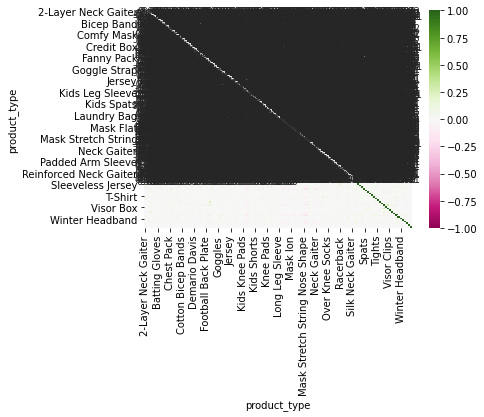

In [62]:
#plt.figure(figsize=(20,20))
sns.heatmap(pivot_corr.round(decimals=2),vmin=-1,vmax=1,annot=True,cmap='PiYG')

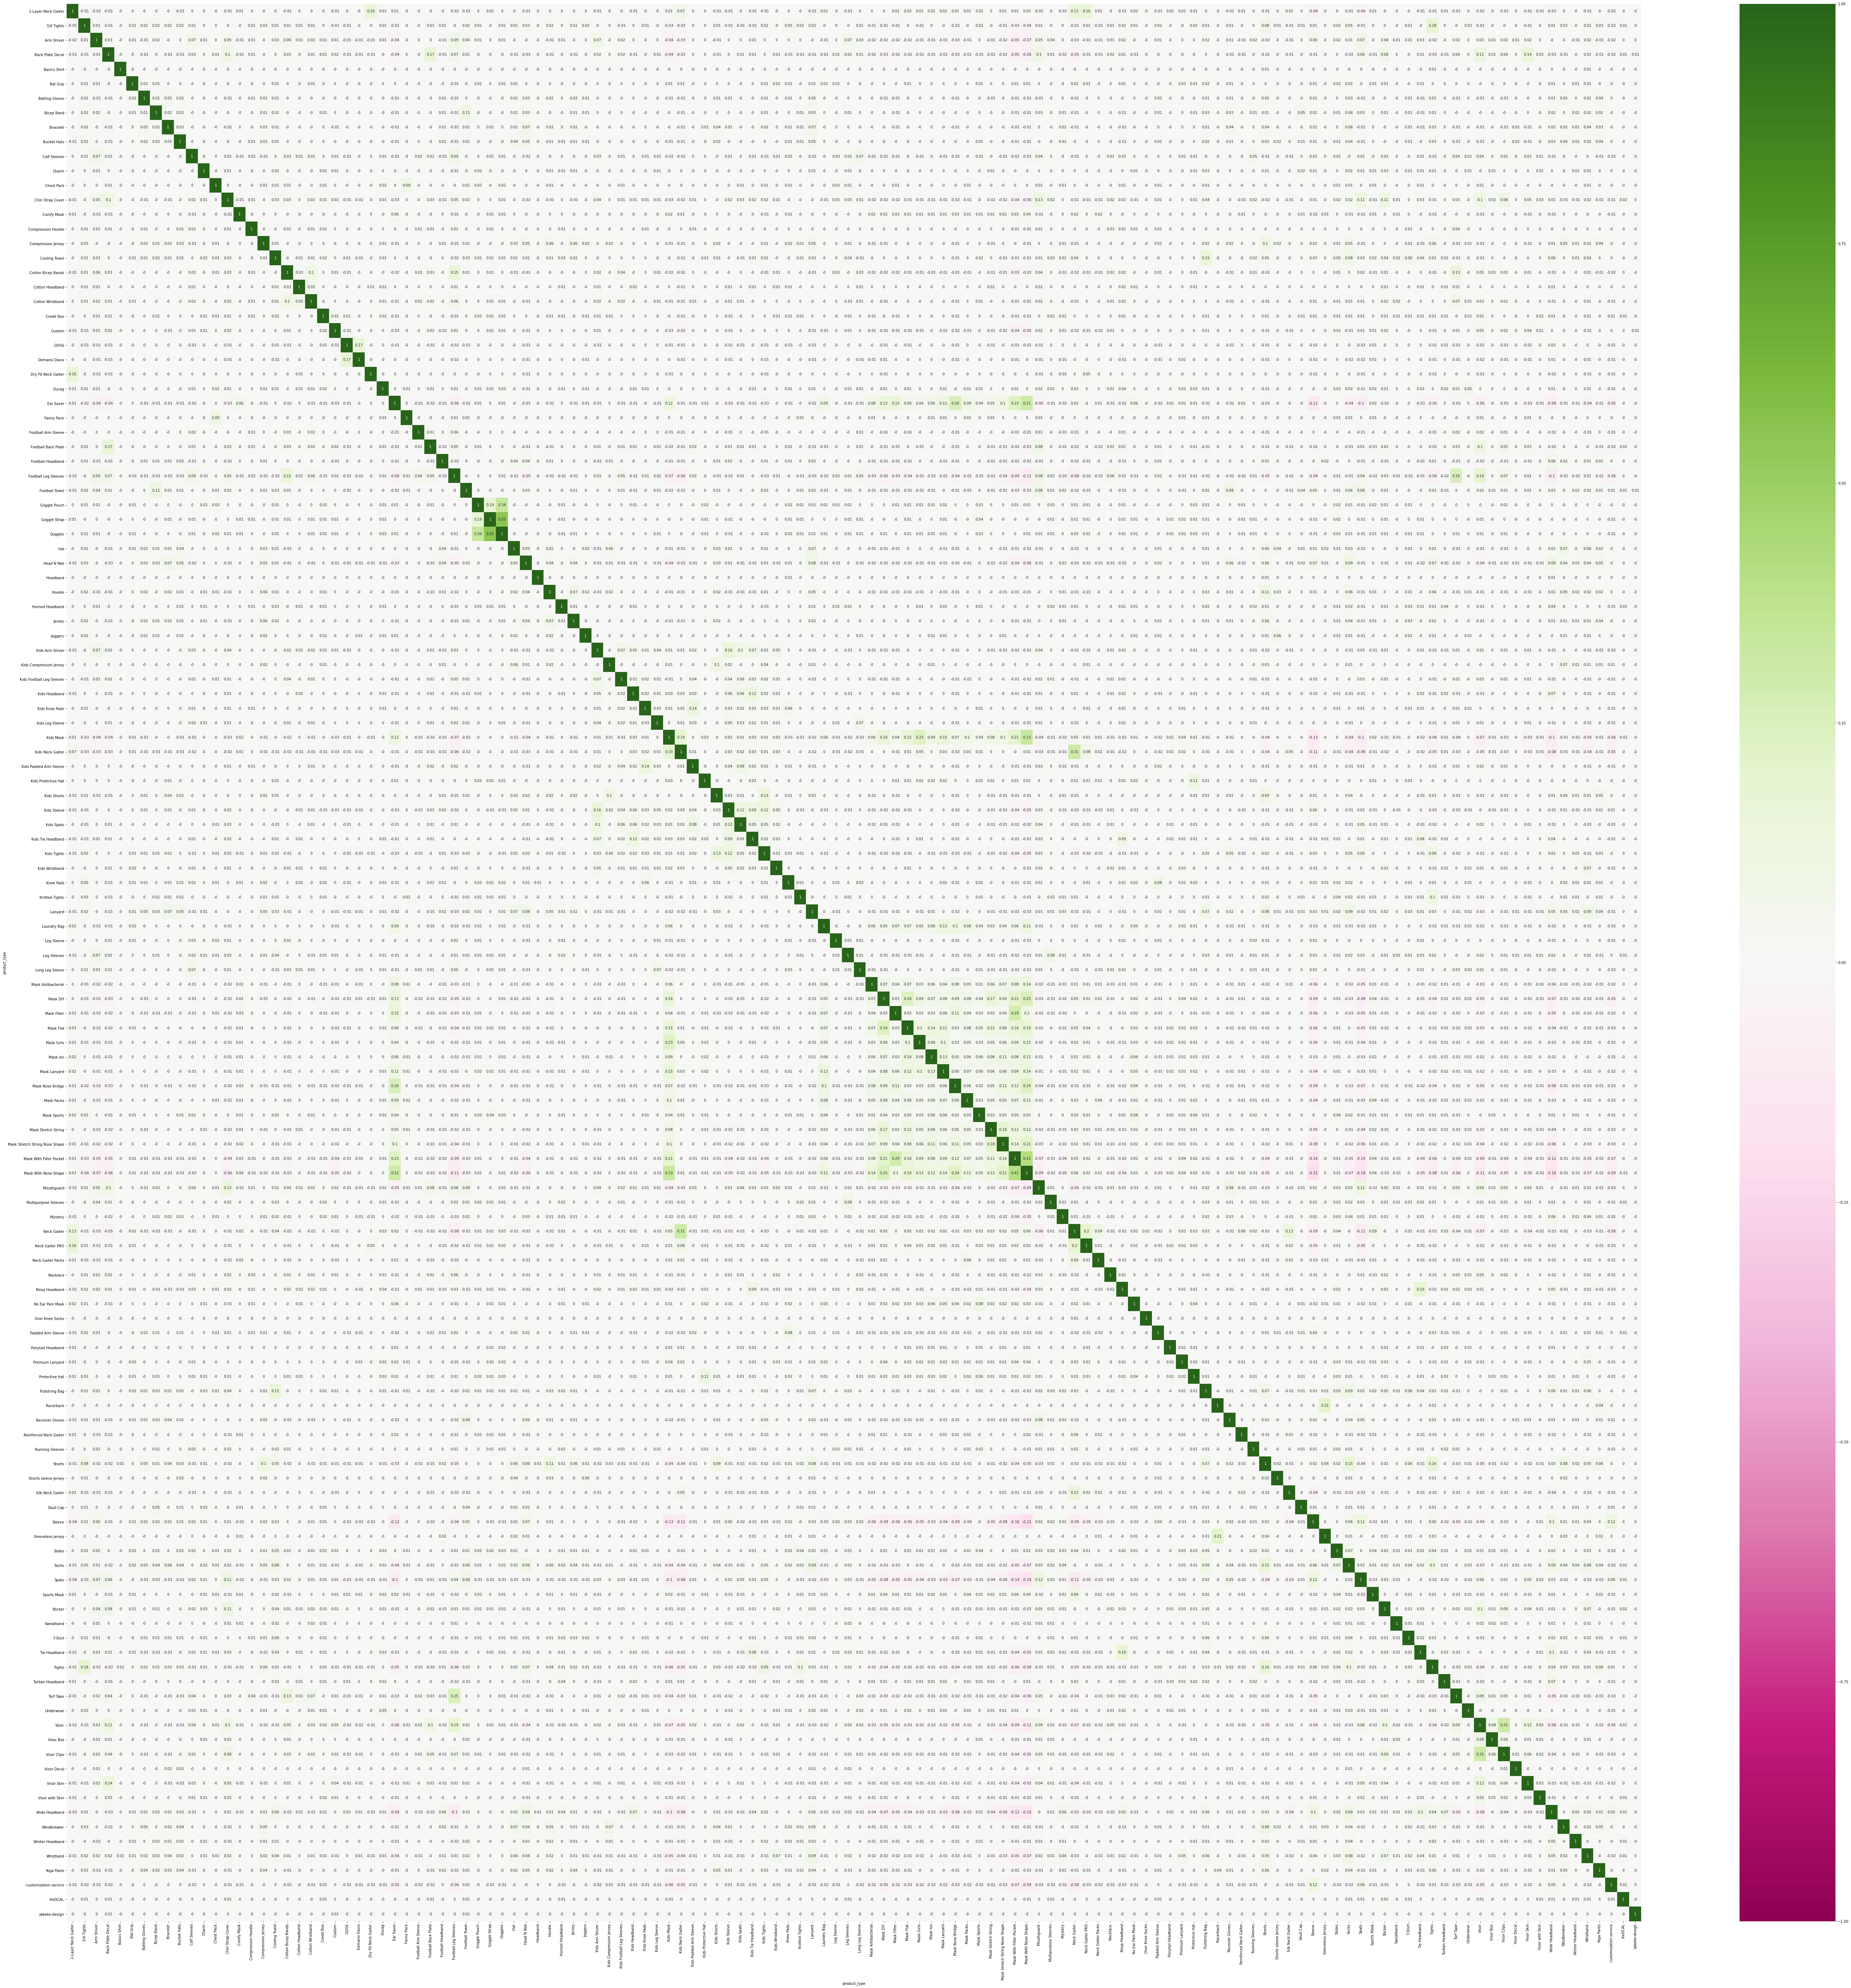

In [63]:
plt.figure(figsize=(100,100))
heatmap_plot = sns.heatmap(pivot_corr.round(decimals=2),vmin=-1,vmax=1,annot=True,cmap='PiYG')

fig = heatmap_plot.get_figure()
fig.savefig("heatmap.png") 
#plt.savefig("figure.png") # save as png

In [156]:
pivot_corr.iloc[0]

product_type
2-Layer Neck Gaiter      1.000000
3/4 Tights              -0.007996
Arm Shiver              -0.015243
Back Plate Decal        -0.011269
Basics Shirt            -0.000285
                           ...   
Wristband               -0.012200
Yoga Pants              -0.001604
customization service   -0.022454
treDCAL                 -0.001974
zakeke-design           -0.000945
Name: 2-Layer Neck Gaiter, Length: 132, dtype: float64

In [102]:
pivot_corr.iloc[0].sort_values(ascending=False)

product_type
2-Layer Neck Gaiter      1.000000
Dry Fit Neck Gaiter      0.164195
Neck Gaiter PRO          0.156152
Neck Gaiter              0.129940
Kids Neck Gaiter         0.072320
                           ...   
customization service   -0.022454
Football Leg Sleeves    -0.023536
Wide Headband           -0.031336
Spats                   -0.042895
Sleeve                  -0.043388
Name: 2-Layer Neck Gaiter, Length: 132, dtype: float64

In [104]:
pivot_corr.shape[0]

132

In [114]:
pivot_corr.iloc[0].sort_values(ascending=False).index[0]

'2-Layer Neck Gaiter'

In [115]:
pivot_corr.iloc[0].sort_values(ascending=False).index[1]

'Dry Fit Neck Gaiter'

In [110]:
pivot_corr.iloc[0].sort_values(ascending=False).values[1]

0.16419528832593178

### Manual Frequency Estimation

In [216]:
summary = pd.DataFrame(columns=['product1','product2',
                                '%_clients_bought_both',
                                '%_clients_bought_both_within', # when_either_was_bought'
                                '%_clients_bought_product1',
                                '%_clients_bought_product2',
                                'correlation'])
summary

,product1,product2,%_clients_bought_both,%_clients_bought_both_within,%_clients_bought_product1,%_clients_bought_product2,correlation


In [221]:
for i in range(0,pivot_corr.shape[0]):
    correlation = pivot_corr.iloc[i].sort_values(ascending=False)
    
    summary.loc[i,'product1'] = correlation.index[0]
    summary.loc[i,'product2'] = correlation.index[1]
    
    summary.loc[i,'%_clients_bought_both'] =          (pivot_[[correlation.index[0],correlation.index[1]]].sum(axis=1)>1).sum()/num_clients*100 
    # num clients that bought both over total num of clients
    
    summary.loc[i,'%_clients_bought_both_within'] =( (pivot_[[correlation.index[0],correlation.index[1]]].sum(axis=1)>1).sum()/(pivot_[[correlation.index[0],correlation.index[1]]].sum(axis=1)==1).sum() )*100 
    # num clients that bought both over num clients that bought either
    
    summary.loc[i,'%_clients_bought_product1'] = pivot_mean.loc[correlation.index[0]]*100
    summary.loc[i,'%_clients_bought_product2'] = pivot_mean.loc[correlation.index[1]]*100
    
    summary.loc[i,'correlation'] = correlation.values[1]


In [222]:
summary

,product1,product2,%_clients_bought_both,%_clients_bought_both_within,%_clients_bought_product1,%_clients_bought_product2,correlation,%_clients_bought_both_whithin
0,2-Layer Neck Gaiter,Dry Fit Neck Gaiter,0.0533251,4.73225,1.14368,0.0898107,0.164195,4.732254
1,3/4 Tights,Tights,1.22999,12.5018,3.51665,8.7818,0.17669,12.501783
2,Arm Shiver,Football Leg Sleeves,1.11702,8.77377,5.7542,9.21121,0.087163,8.773767
3,Back Plate Decal,Football Back Plate,0.261012,7.82005,3.19109,0.668669,0.167319,7.820055
4,Basics Shirt,Shorts,0.000701646,0.0197824,0.000701646,3.54752,0.0138119,0.019782
...,...,...,...,...,...,...,...,...
127,Wristband,Lanyard,0.493959,5.69856,7.7581,1.89795,0.0949834,5.698559
128,Yoga Pants,Tights,0.165588,1.85622,0.470103,8.7818,0.064207,1.856221
129,customization service,Sleeve,3.47595,10.1228,6.00118,35.2886,0.11967,10.122806
130,treDCAL,Chin Strap Cover,0.00771811,0.238198,0.033679,3.22196,0.0204717,0.238198


In [223]:
# test
(pivot_[['2-Layer Neck Gaiter','Dry Fit Neck Gaiter']].sum(axis=1)>1).sum()/num_clients*100

0.053325100686209846

In [225]:
# test 2
( (pivot_[['2-Layer Neck Gaiter','Dry Fit Neck Gaiter']].sum(axis=1)>1).sum()/(pivot_[['2-Layer Neck Gaiter','Dry Fit Neck Gaiter']].sum(axis=1)==1).sum()) *100

4.732254047322541

In [226]:
summary.sort_values('%_clients_bought_both_within',ascending=False)

,product1,product2,%_clients_bought_both,%_clients_bought_both_within,%_clients_bought_product1,%_clients_bought_product2,correlation,%_clients_bought_both_whithin
35,Goggle Strap,Goggles,0.159975,55.4745,0.208389,0.399938,0.552935,55.474453
36,Goggles,Goggle Strap,0.159975,55.4745,0.399938,0.208389,0.552935,55.474453
80,Mask With Nose Shape,Mask With Filter Pocket,5.77946,44.9544,14.5676,9.8476,0.413353,44.954429
79,Mask With Filter Pocket,Mask With Nose Shape,5.77946,44.9544,9.8476,14.5676,0.413353,44.954429
124,Wide Headband,Sleeve,13.365,33.4134,31.4401,35.2886,0.102325,33.413440
...,...,...,...,...,...,...,...,...
130,treDCAL,Chin Strap Cover,0.00771811,0.238198,0.033679,3.22196,0.0204717,0.238198
131,zakeke-design,Custom,0.00210494,0.091687,0.00771811,2.29228,0.0146647,0.091687
39,Headband,Wide Headband,0.00771811,0.0245525,0.0105247,31.4401,0.00925753,0.024552
4,Basics Shirt,Shorts,0.000701646,0.0197824,0.000701646,3.54752,0.0138119,0.019782


In [229]:
summary_ = summary.drop_duplicates('%_clients_bought_both_within').sort_values('%_clients_bought_both_within',ascending=False)

In [230]:
summary_

,product1,product2,%_clients_bought_both,%_clients_bought_both_within,%_clients_bought_product1,%_clients_bought_product2,correlation,%_clients_bought_both_whithin
35,Goggle Strap,Goggles,0.159975,55.4745,0.208389,0.399938,0.552935,55.474453
79,Mask With Filter Pocket,Mask With Nose Shape,5.77946,44.9544,9.8476,14.5676,0.413353,44.954429
124,Wide Headband,Sleeve,13.365,33.4134,31.4401,35.2886,0.102325,33.413440
50,Kids Mask,Mask With Nose Shape,4.1355,29.9446,7.51393,14.5676,0.326984,29.944622
27,Ear Saver,Mask With Nose Shape,3.12443,23.3239,5.07711,14.5676,0.307933,23.323905
...,...,...,...,...,...,...,...,...
130,treDCAL,Chin Strap Cover,0.00771811,0.238198,0.033679,3.22196,0.0204717,0.238198
131,zakeke-design,Custom,0.00210494,0.091687,0.00771811,2.29228,0.0146647,0.091687
39,Headband,Wide Headband,0.00771811,0.0245525,0.0105247,31.4401,0.00925753,0.024552
4,Basics Shirt,Shorts,0.000701646,0.0197824,0.000701646,3.54752,0.0138119,0.019782


In [196]:
display(pivot_corr.shape[0])
summary_['product1'].value_counts().sum()

132

93

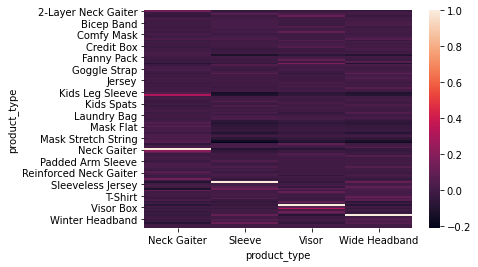

In [139]:
sns.heatmap(pivot_corr[['Neck Gaiter','Sleeve','Visor','Wide Headband']])

### Applying 'apriori' from Mlxtend

In [74]:
frequent_itemsets = apriori(pivot_unstacked.applymap(encode_units).fillna(0), min_support=0.01,use_colnames=True)

In [75]:
frequent_itemsets.head(5)

,support,itemsets
0,0.011437,(2-Layer Neck Gaiter)
1,0.035167,(3/4 Tights)
2,0.057542,(Arm Shiver)
3,0.031911,(Back Plate Decal)
4,0.016973,(Calf Sleeves)


In [76]:
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
36,0.352886,(Sleeve)
48,0.314401,(Wide Headband)
39,0.215511,(Spats)
30,0.184329,(Neck Gaiter)
27,0.145676,(Mask With Nose Shape)
...,...,...
159,0.010595,"(customization service, Sleeve, Wide Headband)"
143,0.010167,"(Sleeve, Arm Shiver, Wide Headband)"
21,0.010111,(Mask Girls)
22,0.010083,(Mask Lanyard)


In [77]:
# example of basket of goods with the highest support level:
(frequent_itemsets.sort_values(by='support',ascending=False))['itemsets'][:5]

36                  (Sleeve)
48           (Wide Headband)
39                   (Spats)
30             (Neck Gaiter)
27    (Mask With Nose Shape)
Name: itemsets, dtype: object

### Creating Association Rules

In [78]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold = 0.05)

In [80]:
# ranked by Support
rules.sort_values(by='support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
148,(Sleeve),(Wide Headband),0.352886,0.314401,0.133650,0.378733,1.204619,0.022702,1.103550
149,(Wide Headband),(Sleeve),0.314401,0.352886,0.133650,0.425093,1.204619,0.022702,1.125598
141,(Spats),(Sleeve),0.215511,0.352886,0.099248,0.460524,1.305023,0.023197,1.199524
140,(Sleeve),(Spats),0.352886,0.215511,0.099248,0.281246,1.305023,0.023197,1.091458
167,(Spats),(Wide Headband),0.215511,0.314401,0.073848,0.342666,1.089904,0.006092,1.043001
...,...,...,...,...,...,...,...,...,...
186,"(Arm Shiver, Wide Headband)",(Sleeve),0.017983,0.352886,0.010167,0.565353,1.602085,0.003821,1.488827
185,"(Sleeve, Wide Headband)",(Arm Shiver),0.133650,0.057542,0.010167,0.076071,1.322008,0.002476,1.020055
184,"(Sleeve, Arm Shiver)",(Wide Headband),0.026747,0.314401,0.010167,0.380115,1.209016,0.001758,1.106011
14,(Sleeve),(Back Plate Decal),0.352886,0.031911,0.010069,0.028532,0.894123,-0.001192,0.996522


In [81]:
# ranked by Lift
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
78,(Mask Filter),(Mask With Filter Pocket),0.013135,0.098476,0.011121,0.846688,8.597910,0.009828,5.880324
79,(Mask With Filter Pocket),(Mask Filter),0.098476,0.013135,0.011121,0.112932,8.597910,0.009828,1.112502
176,(Visor),(Visor Clips),0.094224,0.021134,0.015071,0.159952,7.568635,0.013080,1.165251
177,(Visor Clips),(Visor),0.021134,0.094224,0.015071,0.713147,7.568635,0.013080,3.157636
39,(Turf Tape),(Football Leg Sleeves),0.023779,0.092112,0.013275,0.558277,6.060841,0.011085,2.055332
...,...,...,...,...,...,...,...,...,...
98,(Mask With Nose Shape),(Wide Headband),0.145676,0.314401,0.019857,0.136307,0.433545,-0.025944,0.793800
91,(Mask With Filter Pocket),(Sleeve),0.098476,0.352886,0.012616,0.128108,0.363030,-0.022135,0.742196
90,(Sleeve),(Mask With Filter Pocket),0.352886,0.098476,0.012616,0.035750,0.363030,-0.022135,0.934948
96,(Sleeve),(Mask With Nose Shape),0.352886,0.145676,0.016180,0.045850,0.314743,-0.035227,0.895378


#### Exporting

In [231]:
writer = pd.ExcelWriter('CorrelationSummary.xlsx', engine='xlsxwriter')
summary_.to_excel(writer, sheet_name= 'byCustomer', index=False)

In [232]:
writer.save()